Illustrating confounding and the effect of randomization on estimating effect of X on Y.  I generate a simulated dataset of three variables: confounder $U$, exposure $X$ and outcome $Y$.  These are interconnected in the directed acyclic graph (DAG) of a Bayesian network.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import attila_utils
%matplotlib inline

Assumptions for the confounded model
* $Y \leftarrow U \rightarrow X \rightarrow Y$: a Bayesian network with three nodes and three edges
* $U$ was sampled from a normal distribution: $U \sim \mathcal{N}(0, \mathrm{sdev}_U)$ 
* $U \rightarrow X$ is a linear dependency: $X = \beta_{UX} U + \epsilon_X$, where $\epsilon_X \sim \mathcal{N}(0, S_X)$ 
* $X \rightarrow Y$ and $U \rightarrow Y$ are also linear dependencies so that $Y = \beta_{XY} X + \beta_{UY} U + \epsilon_Y$ where $\epsilon_Y \sim \mathcal{N}(0, S_Y)$
* $\epsilon_X$ and $\epsilon_Y$ are independent

Assumptions for the randomized model
* $U \rightarrow X$ as before
* $X$ was permuted randomly to get $X_\mathrm{perm}$; note that no blocking was done therefore the error of $\beta_{XY}$ is large
* $U \rightarrow Y \leftarrow X_\mathrm{perm}$ so that $Y = \beta_{XY} X_\mathrm{perm} + \beta_{UY} U + \epsilon_Y$; note that $X$ and $U$ are conditionally independent given $Y$

In [2]:
def generate_X(u, beta_ux, sdev=1):
    n = len(u)
    eps = np.random.randn(n) * sdev
    x = beta_ux * u + eps
    return(x)

In [3]:
def generate_Y(u, x, beta_uy, beta_xy, sdev=1):
    n = len(u)
    if n != len(x):
        raise(ValueError)
    eps = np.random.randn(n) * sdev
    y = beta_uy * u + beta_xy * x + eps
    return(y)

In [4]:
n = 100
sdev_u = 10
sdev_x = 2
sdev_y = 1
beta_ux = 1
beta_uy = 1.5
beta_xy = -1

def main(n=n, sdev_u=sdev_u, sdev_x=sdev_x, beta_ux=beta_ux, beta_uy=beta_uy, beta_xy=beta_xy):
    u = np.random.randn(n) * sdev_u
    x = generate_X(u=u, beta_ux=beta_ux, sdev=sdev_x)
    x_randomized = np.random.permutation(u)
    y = generate_Y(u=u, x=x, beta_uy=beta_uy, beta_xy=beta_xy, sdev=sdev_y)
    y_randomized = generate_Y(u=u, x=x_randomized, beta_uy=beta_uy, beta_xy=beta_xy, sdev=sdev_y)
    val = pd.DataFrame({'u': u, 'x': x, 'x_randomized': x_randomized, 'y': y, 'y_randomized': y_randomized})
    return(val)

data = main()

['named-figure/regrplot-confounded.png',
 'named-figure/regrplot-confounded.pdf']

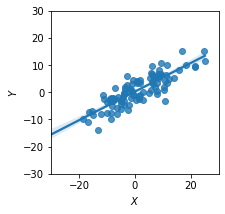

In [5]:
%matplotlib inline
def myplot(data, randomized):
    if randomized:
        which_x = 'x_randomized'
        which_y = 'y_randomized'
    else:
        which_x = 'x'
        which_y = 'y'
    fig, ax = plt.subplots(1, figsize=(3, 3))
    g = sns.regplot(x=which_x, y=which_y, data=data, ax=ax)
    lim = 30
    ax.set_xlim(- lim, lim)
    ax.set_ylim(- lim, lim)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    return(fig)

fig = myplot(data, randomized=False)
attila_utils.savefig(fig, 'regrplot-confounded')

['named-figure/regrplot-randomized.png',
 'named-figure/regrplot-randomized.pdf']

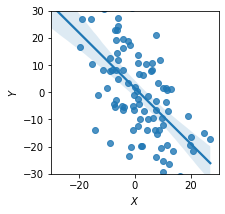

In [6]:
fig = myplot(data, randomized=True)
attila_utils.savefig(fig, 'regrplot-randomized')

In [7]:
%connect_info

{
  "shell_port": 55519,
  "iopub_port": 51103,
  "stdin_port": 37607,
  "control_port": 52541,
  "hb_port": 46437,
  "ip": "127.0.0.1",
  "key": "1d25cf1b-ea0e0c0e654da0875cc0bdbd",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-917dcff6-a9f8-46c4-b53c-0c683908b632.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
